In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import timeit

from QuantumWalk.State import State
from QuantumWalk.Operator import Operator
from QuantumWalk.QuantumWalk import QuantumWalk
from QuantumWalk.ProbabilityDistribution import ProbabilityDistribution

# Cycle Graph

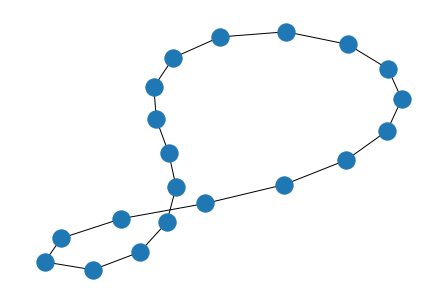

In [2]:
nx.draw(nx.cycle_graph(20))

In [5]:
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

initState = State(n,marked)
initState.timedBuildState()
print("\nN=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

State took 1.0020999980042689e-05 seconds.

N=1000	Time=600	Gamma=0.35	


In [6]:
startTimeGraph = timeit.default_timer()
graph2 = nx.cycle_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

Graph took 0.0040096640000228945 seconds.


In [ ]:
# ------ Linalg Expm version (much slower) ------ #

# op = Operator(graph2,n,t,gamma)

# startTimeExpm = timeit.default_timer()
# op.buildOperator()
# endTimeExpm = timeit.default_timer()

# executionTimeExpm = (endTimeExpm - startTimeExpm)
# print("\tNormal operator took %s seconds. (linalg.expm)" % executionTimeExpm)

In [ ]:
# ------ Diagonal version ------ #
op = Operator(graph2,t,gamma)
op.timedBuildDiagonalOperator()
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

In [ ]:
walk = QuantumWalk(initState,op)

walk.timedBuildWalk()

In [ ]:
probDist = ProbabilityDistribution(walk.getWalk())
probDist.timedBuildProbDist()

In [ ]:
plt.plot(probDist.getProbDist())

# Complete Graph

In [ ]:
nx.draw(nx.complete_graph(5))

In [ ]:
n = 1000
t=600
gamma=1/(2*np.sqrt(2))
marked = [int(n/4),int(n/2),int(n/2)+int(n/4)]

initState = State(n,marked)
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))

In [ ]:
startTimeGraph = timeit.default_timer()
graph2 = nx.complete_graph(n)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)

In [ ]:
# ------ Diagonal version ------ #

op = Operator(graph2,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

In [ ]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

In [ ]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

In [ ]:
plt.plot(probDist.getProbDist())

# 2D Graphs

In [ ]:
nx.draw(nx.grid_2d_graph(5, 5))

In [ ]:
n = 10
m = 100
t= 10
gamma=1/(2*np.sqrt(2))
marked = [int(n/2)]

initState = State(n*m,marked)
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(n,t,round(gamma,2)))


In [ ]:
startTimeGraph = timeit.default_timer()
graph2 = nx.grid_2d_graph(n, m)
endTimeGraph = timeit.default_timer()

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)
# nx.draw(graph2)

In [ ]:
# ------ Diagonal version ------ #

op = Operator(graph2,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

In [ ]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

In [ ]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

In [ ]:
plt.plot(probDist.getProbDist())

# Balanced Tree

In [ ]:
nx.draw(nx.balanced_tree(2, 5))

In [ ]:
n = 9
r = 2
t= 500
gamma=1/(2*np.sqrt(2))


In [ ]:
startTimeGraph = timeit.default_timer()
graph2 =nx.balanced_tree(r, n)
endTimeGraph = timeit.default_timer()

initState = State(len(graph2),[int(len(graph2)/2)])
initState.buildState()
print("N=%s\tTime=%s\tGamma=%s\t"%(len(graph2),t,round(gamma,2)))

executionTimeGraph = (endTimeGraph - startTimeGraph)
print("Graph took %s seconds." % executionTimeGraph)
# nx.draw(graph2)

In [ ]:
# ------ Diagonal version ------ #

op = Operator(graph2,t,gamma)

startTimeExpm = timeit.default_timer()
op.buildDiagonalOperator()
endTimeExpm = timeit.default_timer()

executionTimeExpm = (endTimeExpm - startTimeExpm)
print("Diagonal operator took %s seconds." % executionTimeExpm)
# print("Normal / Diagonal = %s times faster" % (round(executionTimeExpm / executionTimeDiag, 2)))

In [ ]:
walk = QuantumWalk(initState,op)

startTimeWalk = timeit.default_timer()
walk.buildWalk()
endTimeWalk = timeit.default_timer()

executionTimeWalk = (endTimeWalk - startTimeWalk)
print("Walk took %s seconds." % executionTimeWalk)

In [ ]:
probDist = ProbabilityDistribution(walk.getWalk())

startTimeProbDist = timeit.default_timer()
probDist.buildProbDist()
endTimeProbDist = timeit.default_timer()

executionTimeProbDist = (endTimeProbDist - startTimeProbDist)
print("ProbDist took %s seconds." % executionTimeProbDist)

In [ ]:
plt.plot(probDist.getProbDist())

# Barbell Graph

In [ ]:
nx.draw(nx.barbell_graph(5,1))